In [ ]:
from tables import start
start()

In [3]:
import pandas as pd
from value import Value
tab = pd.read_csv("tables/226t", sep="\t")
tab2 = pd.DataFrame()
tab2["T"] = pd.Series(map(lambda t: Value(values=[t[0]], syst=t[1]),zip(tab["T"], tab["sigmaT"])))
tab2["V"] = pd.Series(map(lambda t: Value(values=[t[0]], syst=t[1] * 2),zip(tab["V"], tab["sigmaV"])))


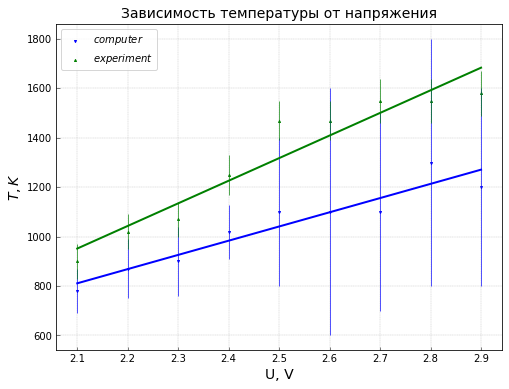

[FitParameters(legend='$computer$', a=Decimal('0E+4'), sigma_a=Decimal('9E+4'), b=Decimal('-0E+5'), sigma_b=Decimal('5E+5'), r=0.9485279123802325),
 FitParameters(legend='$experiment$', a=Decimal('1E+3'), sigma_a=Decimal('1.1E+4'), b=Decimal('-0E+4'), sigma_b=Decimal('6E+4'), r=0.9538190589830701)]

In [6]:
%matplotlib inline
m = 0.91 * 10**-30
k = 1.38 * 10**-23
tab2["V"][3] = tab2["V"][3] - 7
Tn = (tab2["V"] * 1000) ** 2 * m / (2 * k)
import numpy as np
U = list(map(lambda i:Value(const=i), np.linspace(2.1, 2.9, 9)))
from plotter import Plotter
Plotter(draw_legend=True).set_name("226graph").set_title("Зависимость температуры от напряжения").set_x_name("U, V").set_y_name("$T, K$").\
        add_line(Plotter.get_new_line(x_value=U, y_value=tab2["T"],
                                      draw_error=True, legend='$computer$', fit=True, color='blue', marker='v')).\
        add_line(Plotter.get_new_line(x_value=U, y_value=Tn,
                                      draw_error=True, legend='$experiment$', fit=True, color='green', marker='^')).\
        plot(show=True, save=True)